In [1]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 9.3 MB 52.6 MB/s 
     |████████████████████████████████| 140 kB 69.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [2]:
import json
from PIL import Image, ImageOps
import os
import io
import boto3

In [34]:
prefix_info = {
  'image' : "assets/photoDigm/userPicture/",
  'frame' : "assets/photoDigm/frame/",
  'photoDigm' : "assets/photoDigm/photoDigm/",
}

def connect_s3():
  with open("/content/drive/MyDrive/yeoreodigm/data_files/aws_access_info.json") as f:
    aws_access_info = json.load(f)
  return boto3.resource('s3',aws_access_key_id=aws_access_info['AWS_ACCESS_KEY_ID'],
                                  aws_secret_access_key=aws_access_info['AWS_SECRET_ACCESS_KEY'],
                                  region_name=aws_access_info['REGION_NAME'])

#img_type : frame,image,photoDigm
def load_image(s3,img_type,file_name):
  print("load_image....")
  bucket = 'yeoreodigm-s3'
  Bucket = s3.Bucket(bucket)
  prefix = prefix_info[img_type]
  entire_path = prefix + file_name
  object_ = Bucket.Object(entire_path)
  response = object_.get()
  file_stream = response['Body']
  img = Image.open(file_stream)
  print("Successfully loaded original img")
  print("applying new process if img has rotation info")
  exif = img.getexif()
  for k in exif.keys():
    if k!=0x0112 and k!= 0x10E: # orientation information (0x0112),frame number (0x10E)
      exif[k] = None
      del exif[k]
  new_exif = exif.tobytes()
  img.info["exif"] = new_exif
  transposed_img = ImageOps.exif_transpose(img)
  print("Everything done.")
  return transposed_img

In [18]:
img = Image.open("/content/drive/MyDrive/pillow_image_files/auto-3298890.jpg")

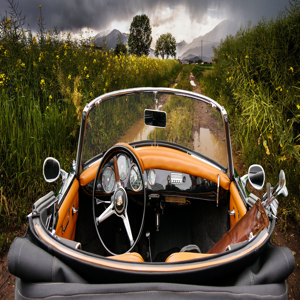

In [12]:
test1=img.resize((300,300))
test1

In [14]:
test2 = img.thumbnail((300,300),Image.ANTIALIAS)

None

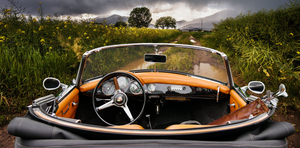

In [15]:
display(img)

In [16]:
img.size

(300, 148)

In [ ]:
test3 = img.t

In [13]:
img

Output hidden; open in https://colab.research.google.com to view.

In [23]:
new_width = 300
aspect_ratio = img.height / img.width
new_height = int(new_width * aspect_ratio)
resized_img = img.resize((new_width,new_height),Image.ANTIALIAS)

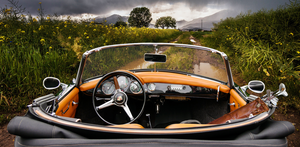

In [24]:
resized_img

In [25]:
resized_img.size

(300, 147)

##crop image

In [44]:
def crop_to_aspect(img, aspect, divisor=1, alignx=0.5, aligny=0.5):
  """Crops an image to a given aspect ratio.
  Args:
      aspect (float): The desired aspect ratio.
      divisor (float): Optional divisor. Allows passing in (w, h) pair as the first two arguments.
      alignx (float): Horizontal crop alignment from 0 (left) to 1 (right)
      aligny (float): Vertical crop alignment from 0 (left) to 1 (right)
  Returns:
      Image: The cropped Image object.
  """
  print(img.size)
  width,height = img.size[0],img.size[1]
  if width / height > aspect / divisor:
      newwidth = int(height * (aspect / divisor))
      newheight = height
  else:
      newwidth = width
      newheight = int(width / (aspect / divisor))
  img2 = img.crop((alignx * (width - newwidth),
                    aligny * (height - newheight),
                    alignx * (width - newwidth) + newwidth,
                    aligny * (height - newheight) + newheight))
  return img2

In [ ]:
crop = crop_to_aspect(dog,(720/960))
crop

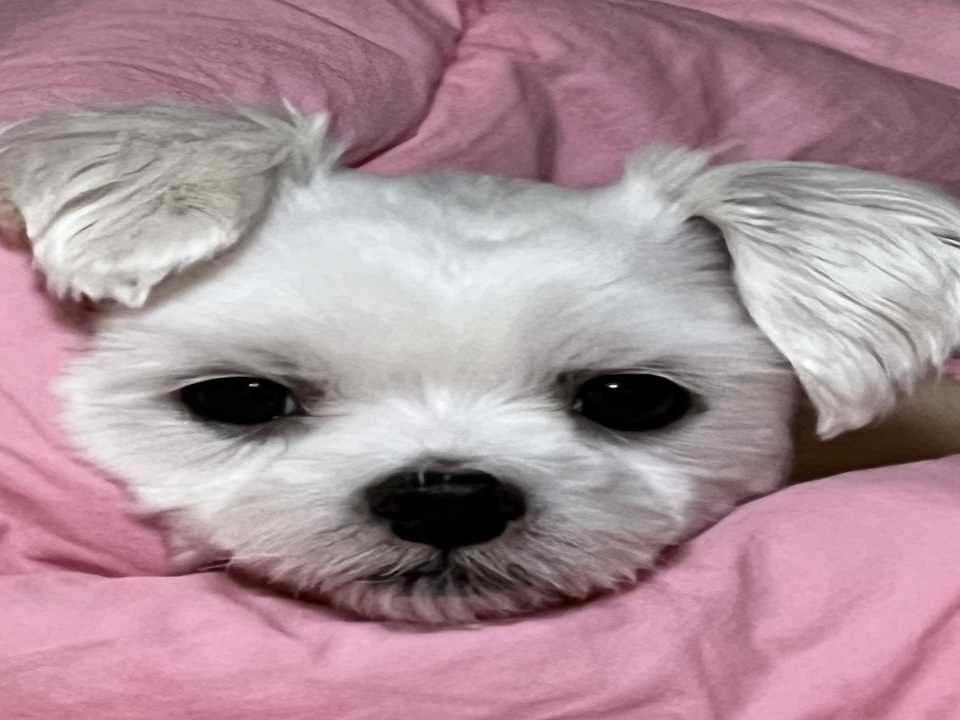

In [56]:
crop2 = crop.resize((960,720),Image.ANTIALIAS)
crop2

In [51]:
dog.size

(3024, 4032)

In [47]:
crop.size

(3024, 2268)

In [50]:
crop2.size

(960, 720)

In [28]:
crop.thumbnail((300,300),Image.ANTIALIAS)

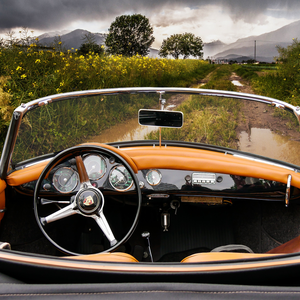

In [29]:
crop

##s3에서 파일 가져와서 바꿔보기

In [35]:
file_name = "7996cb8b-4360-4211-af5c-290aba14aebc"
s3 = connect_s3()
dog = load_image(s3,'image',file_name)

load_image....
Successfully loaded original img
applying new process if img has rotation info
Everything done.


In [37]:
#1:(690,920),2:(960,720)

##crop 활용한 비율유지하면서 바꾸는 메소드 적용

In [53]:
from PIL import ImageOps
crop_dog = ImageOps.fit(dog,(960,720))

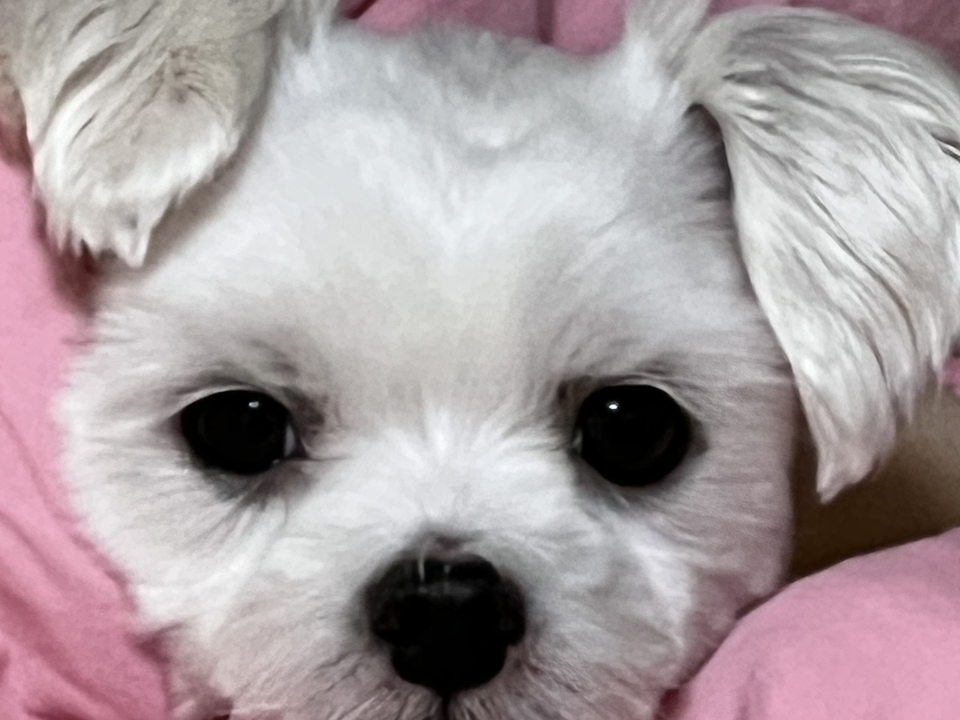

In [54]:
crop_dog

In [55]:
crop_dog.size

(960, 720)